In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'ABST', 'AMEH', 'AMRK', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CENN',
    'CGAU', 'CHEF', 'CIZN', 'COOP', 'CTGO', 'CVE', 'DQ', 'DTST',
    'DYAI', 'EP', 'ERIE', 'ESOA', 'FCUV', 'FKWL', 'FSI', 'GGE', 'GME',
    'HBM', 'HMY', 'HNRG', 'IDR', 'INTZ',  'KREF', 'MCVT', 'MICS',
    'MNMD', 'MOBQ', 'NAN', 'OMQS', 'PACB', 'PETV', 'POWW', 'PRPH',
    'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS', 'YORW', 'ZEST',
    'ZYXI']
BEST_WEIGHTED = [
    'AGI', 'CEF', 'CFFN', 'CZFS', 'DGX', 'FCN', 'FNV', 'GCBC', 'GUT',
    'IEI', 'IIM', 'KSM', 'LFMD', 'MIN', 'MIY', 'MMU', 'MTA', 'NAZ',
    'NEN', 'NPV']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-12-31', datetime.date(2022, 12, 31))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  160 of 160 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CFFN... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CTGO... CVE... CZFS... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... EP... ERIE... ESOA... ETSY... FCN... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... GUT... HBM... HMY... HNRG... IDR... IDXX... IEI... IIM... INTG... INTZ... ISRG... JD... KREF... KSM... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MIN... MIY... MMU... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAN... NAZ... NEN... NET... NOW... NPV... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RB

In [5]:
data['Date'].tail()

2514   2022-12-23
2515   2022-12-27
2516   2022-12-28
2517   2022-12-29
2518   2022-12-30
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.025403
2       0.997914
3       1.004865
4       0.996877
5       0.996758
          ...   
2514    1.005868
2515    0.995950
2516    0.987979
2517    1.017461
2518    0.997459
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.031199
2,1.006383
3,1.010520
4,1.001395
5,1.004743
...,...
2514,1.006688
2515,0.996563
2516,0.999305
2517,1.044219


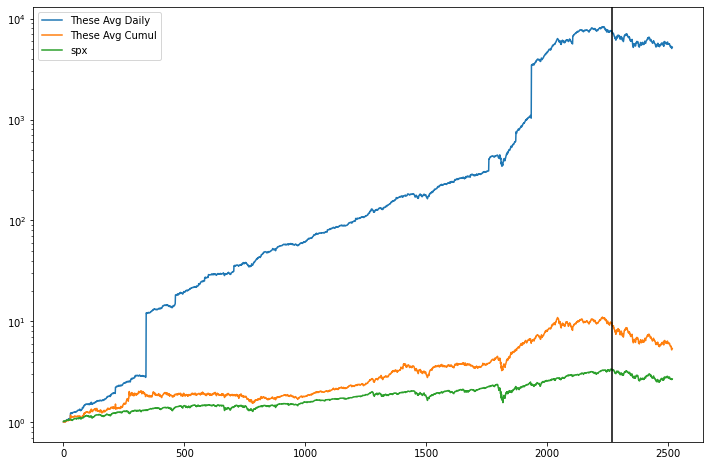

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-12-31,NaN,NaN
1,2013-01-02,1.009455,1.009455
2,2013-01-03,1.007860,1.007211
3,2013-01-04,1.017564,1.016940
4,2013-01-07,1.024354,1.023766


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-12-23,5241.296764,5.556823
2515,2022-12-27,5133.148927,5.280395
2516,2022-12-28,5059.640429,5.224924
2517,2022-12-29,5212.196505,5.377387
2518,2022-12-30,5230.072833,5.395282


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

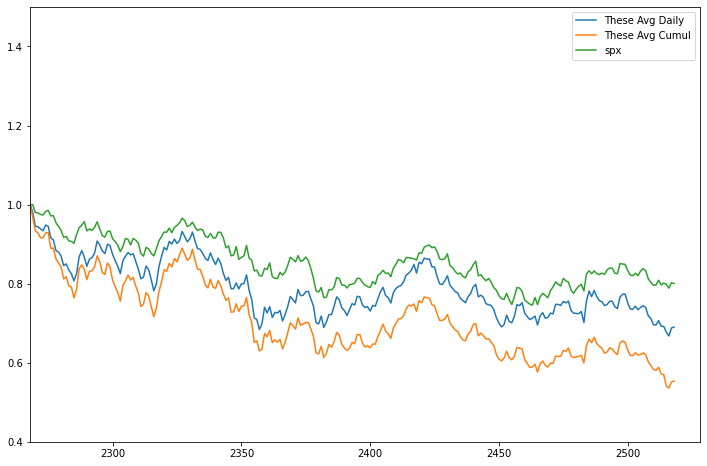

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,61.919998,61.919998,62.560001,59.849998,59.849998,4.125843,1.034586,1.023471,0.989256
2460,60.049999,60.049999,61.200001,59.529999,60.119999,4.095178,0.998836,0.969800,0.970930
2461,59.200001,59.200001,59.619999,57.570000,58.810001,4.080922,1.006632,0.985845,0.979351
2462,57.490002,57.490002,59.180000,56.020000,58.439999,4.051611,0.983744,0.971115,0.987162
2463,57.360001,57.360001,57.680000,55.459999,56.410000,4.049347,1.016841,0.997739,0.981214


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,61.919998,61.919998,62.560001,59.849998
2460,60.049999,60.049999,61.200001,59.529999
2461,59.200001,59.200001,59.619999,57.570000
2462,57.490002,57.490002,59.180000,56.020000
2463,57.360001,57.360001,57.680000,55.459999


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,61.919998,61.919998,62.560001,59.849998,61.200001,59.529999,0.988372,0.961402
2460,60.049999,60.049999,61.200001,59.529999,59.619999,57.570000,0.992839,0.958701
2461,59.200001,59.200001,59.619999,57.570000,59.180000,56.020000,0.999662,0.946284
2462,57.490002,57.490002,59.180000,56.020000,57.680000,55.459999,1.003305,0.964689
2463,57.360001,57.360001,57.680000,55.459999,54.990002,51.389999,0.958682,0.895920


0.05    0.977712
Name: HighMult, dtype: float64


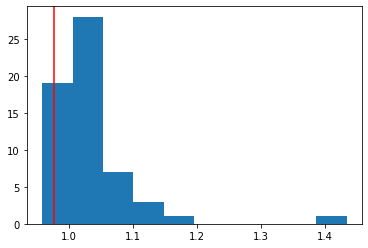

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0244355662861402


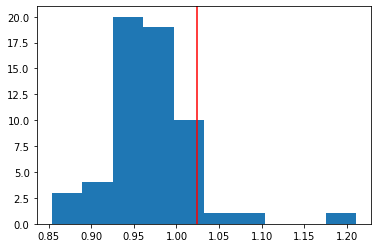

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0244355662861402, 0.9777122957569568)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0134334187512108, 0.9896177818432456)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,61.919998,61.919998,62.560001,59.849998,61.200001,59.529999,0.988372,0.961402,0
2460,60.049999,60.049999,61.200001,59.529999,59.619999,57.570000,0.992839,0.958701,0
2461,59.200001,59.200001,59.619999,57.570000,59.180000,56.020000,0.999662,0.946284,0
2462,57.490002,57.490002,59.180000,56.020000,57.680000,55.459999,1.003305,0.964689,0
2463,57.360001,57.360001,57.680000,55.459999,54.990002,51.389999,0.958682,0.895920,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0073840247495003, 0.98521915583503, 1.054012978996282, 0.9753335220868229)

In [27]:
get_hilo_mults(aapl)

(1.0013902122221432,
 0.9901336615436135,
 1.0134958130362035,
 0.9882186560081453)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.001390,0.990134,1.013496,0.988219
1,ABMD,1.001521,1.000041,1.007638,0.996771
2,ABNB,0.992700,0.990917,1.013344,0.981924
3,ABST,0.996236,0.998984,1.001856,0.994906
4,ACN,1.002029,0.991997,1.015957,0.989098


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,129.929993,AAPL
ABMD,NaN,ABMD
ABNB,85.5,ABNB
ABST,10.44,ABST
ACN,266.839996,ACN
...,...,...
ZM,67.739998,ZM
ZYXI,13.91,ZYXI
^GSPC,3839.5,^GSPC
^IXIC,10466.481445,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.001390,0.990134,1.013496,0.988219,129.929993
1,ABMD,1.001521,1.000041,1.007638,0.996771,NaN
2,ABNB,0.992700,0.990917,1.013344,0.981924,85.5
3,ABST,0.996236,0.998984,1.001856,0.994906,10.44
4,ACN,1.002029,0.991997,1.015957,0.989098,266.839996


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv